# Candidate Number: 014381

# Imports

In [114]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy.random import randn

# Benchmark Functions

In [103]:
"""
Functions to optimise.
"""

class F1():

    def __init__(self):
        self.name = "F1"
        self.variables = 3
        self.bounds = [(-5.12, 5.12) for _ in range(self.variables)]
        self.precision = 0.01
        self.maximum = 78.6
        self.optimal = np.asarray([[-5.12, 5.12], [-5.12, 5.12], [-5.12, 5.12]])
    
    def evaluate(self, x):
        total = 0.0
        for i in range(3):
            total += x[i]**2
        return total, abs(total - self.maximum)

class F2():
    
    def __init__(self):
        self.name = "F2"
        self.variables = 2
        self.bounds = [(-2.048, 2.048) for _ in range(self.variables)]
        self.precision = 0.001
        self.maximum = 3905.93
        self.optimal = np.asarray([[-2.048], [-2.048]])
    
    def evaluate(self, x):
        total = 100 * (x[0]**2 - x[1])**2 + (1 - x[0])**2
        return total, abs(total - self.maximum)

class F3():

    def __init__(self):
        self.name = "F3"
        self.variables = 5
        self.bounds = [(-5.12, 5.12) for _ in range(self.variables)]
        self.precision = 0.01
        self.maximum = 25
        self.optimal = np.asarray([[5.12], [5.12], [5.12], [5.12], [5.12]])
    
    def evaluate(self, x):
        total = 0
        for i in range(5):
            total += math.floor(x[i])
        #total += (6 * 5)  # needed?
        return total, abs(total - self.maximum)


class F4():

    def __init__(self):
        self.name = "F4"
        self.variables = 30
        self.bounds = [(-1.28, 1.28) for _ in range(self.variables)]
        self.precision = 0.01
        self.maximum = 1248.2
        self.optimal = np.asarray([[-1.28, 1.28] for _ in range(self.variables)])
    
    def evaluate(self, x):
        total = 0
        for i in range(30):
            total += i * x[i]**4 + random.gauss(0, 1)
        return total, abs(total - self.maximum)

    
class F5():
    
    def __init__(self):
        self.name = "F5"
        self.variables = 2
        self.bounds = [(-65.536, 65.536) for _ in range(self.variables)]
        self.precision = 0.001
        self.maximum = 500
        self.optimal = np.asarray([[-32, 32] for _ in range(self.variables)])
    
    def evaluate(self, x):
        
        def f(i, x):
            return 1 / (i + ((x[0] - a[0,i-1])**6) + ((x[1] - a[1,i-1])**6))
        
        a = np.asarray([[-32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32],
                        [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16, 0 ,0 ,0 ,0, 0, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32]])

        total = 0
        for j in range(1,26):
            total += (f(j, x))
        total += 0.002
        total = total**-1
        return total, abs(total - self.maximum)

# Random Search Algorithm

In [104]:
class RandomSearch():
    
    def __init__(self, maxiter):
        """
        Initialise Parameters.
        
        Parameters:
            maxiter (int): Maximum number of iterations to complete.
        """
        self.maxiter = maxiter
    
    
    def random_solution(self, bounds):
        """
        Generate a random solution within the search space.
        
        Parameters:
            bounds (list of floats): Problem Domain.
            
        Returns:
            (list of floats): A random solution within the search space.
        """
        return [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))]
        
    
    def optimise(self, costFunc):
        """
        Optimise the given objective function.
        
        Parameters:
            costFunc (Func): The cost function to optimise.
        Returns:
            best_fitness (float): best fitness found.
            best_solution (list of float): best decision variables found.
            output (list of floats): the value of the costFunc after each iterations.
        """
        best_fitness = float('inf')
        best_solution = []
        output = [0 for _ in range(self.maxiter)]
        
        for i in range(self.maxiter):
            candidate = self.random_solution(costFunc.bounds)
            res, error = costFunc.evaluate(candidate)
            if error < best_fitness:
                best_fitness = error
                best_res = res
                best_solution = candidate
                
            output[i] = best_res
        return best_fitness, best_solution, output

# Stochastic Hill Climber

In [105]:
class StochasticHillClimber():
    
    def __init__(self, maxiter=4000, step_size=1.0):
        """
        Initialise parameters for the algorithm.
        
        Parameters:
            maxiter (int): the maximum number of fitness evaluations to perform.
            
        """
        self.maxiter = maxiter
        self.step_size = step_size
    
    
    def random_solution(self, bounds):
        """
        Generate a random solution within the search space.
        
        Parameters:
            bounds (list of floats): Problem Domain.
            
        Returns:
            (list of floats): A random solution within the search space.
        """
        return [random.uniform(bounds[i][0], bounds[i][1]) for i in range(len(bounds))]
        
    
    def optimise(self, costFunc):
        """
        Optimise the given objective function.
        
        Parameters:
            costFunc (Func): The cost function to optimise.
        Returns:
            best_fitness (float): best fitness found.
            best_solution (list of float): best decision variables found.
            output (list of floats): the value of the costFunc after each iterations.
        """
        best_fitness = float('inf')
        best_solution = []
        output = [0 for _ in range(self.maxiter)]
        
        solution = self.random_solution(costFunc.bounds)
        
        for i in range(self.maxiter):
            candidate = [(solution[i] + randn(costFunc.variables)[0] * self.step_size) for i in range(costFunc.variables)]  # uniform
            res, error = costFunc.evaluate(candidate)
            if error < best_fitness:
                best_fitness = error
                best_res = res
                best_solution = candidate
                
            output[i] = best_res
        return best_fitness, best_solution, output

In [63]:
def parameter_tune_hill_climber():
    """
    Find the optimal parameters for Stochastic Hill Climber for each test problem.
    
    Returns:
        opt_param (List of floats): A list of the optimal parameters.
    """
    problems = [F1(), F2(), F3(), F4(), F5()]
    parameters = np.arange(0, 1.1, 0.1)
    maxiter = 4000
    N = 100
    fitness = np.zeros((len(problems), len(parameters), N))
    
    for i in range(len(problems)):
        for j in range(len(parameters)):
            for k in range(N):
                optimiser = StochasticHillClimber(maxiter, parameters[j])
                fit, _, _ = optimiser.optimise(problems[i])
                fitness[i,j,k] = fit

    idx = np.argmin(np.mean(fitness, axis=2), axis=1)
    opt_param = [parameters[idx[i]] for i in range(len(problems))]
    return opt_param

print(parameter_tune_hill_climber())

[1.0, 1.0, 0.9, 0.7000000000000001, 0.8]


# Discrete Binary Particle Swarm

In [109]:
def pos_to_real(encoded, bits):
    """
    Converts positive integers in the objective space into their binary representation.
    
    Returns:
        (list of strings) the encoded binary decision variables.
    """
    decision_vars = [encoded[i:i+bits] for i in range(0, len(encoded), bits)]
    return [int(''.join(decision_vars[i]), 2) for i in range(len(decision_vars))]
    

class Particle:
    def __init__(self, x0, bits, num_dimensions, W, C_1, C_2, VMAX):
        """
        Initialise parameters for the algorithm.
        
        Parameters:
            x0 (list of floats): initial starting position in the decision space.
            bits (int): The number of bits used for the encoding.
            num_dimensions (int): The number of dimensions in the objective space.
            W (float): The inertia parameter.
            C_1 (float): The cognative constant.
            C_2 (float): The social constant.
            VMAX (float): The mutation rate.
        """
        self.bits = bits
        self.num_dimensions = num_dimensions
        self.x = []
        self.v = [0 for _ in range(self.num_dimensions)]
        self.p = []
        self.min_error = float('inf')
        self.res = 0
        self.W = W
        self.C_1 = C_1
        self.C_2 = C_2
        self.VMAX = VMAX
        
        for d in range(self.num_dimensions):
            self.v[d] = random.uniform(0,1)
        
        # encode random guess
        for i in range(len(x0)):
            self.x += list(format(x0[i], 'b').zfill(self.bits))
    
    
    def evaluate(self, costFunc):
        """
        Evaluate the current fitness.
        
        Parameters:
            costFunc (func): The objective function to optimise.
        """
        real_position = pos_to_real(self.x, self.bits)
        decision_vars = [costFunc.bounds[i][0] + (real_position[i]*costFunc.precision) for i in range(costFunc.variables)]
        self.res, self.err = costFunc.evaluate(decision_vars)
        
        if self.err < self.min_error:
            self.p = self.x
            self.min_error = self.err
    
    
    def update_v(self, p_g):
        """
        Update new particle velocity.
        
        Parameters:
            p_g (list of bits): the previous best position.
        """
        
        for d in range(self.num_dimensions):
            r1 = random.random()
            r2 = random.random()

            vel_cognitive = self.C_1 * r1 * (int(self.p[d]) - int(self.x[d]))
            vel_social = self.C_2 * r2 * (int(self.p[d]) - int(self.x[d]))
            self.v[d] = (self.W * self.v[d]) + vel_cognitive + vel_social

            if abs(self.v[d]) > self.VMAX:
                self.v[d] = self.VMAX
            
    
    def update_position(self, costFunc):
        """
        Update the particle position based off new velocity updates.
        
        Parameters:
            costFunc (func): The objective function to optimise.
        """
        
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        for d in range(self.num_dimensions):
            if random.random() < sigmoid(self.v[d]):
                self.x[d] = "1"
            else:
                self.x[d] = "0"
        
        real = pos_to_real(self.x, self.bits)
        decision_vars = [costFunc.bounds[i][0] + (real[i]*costFunc.precision) for i in range(costFunc.variables)]
        binary = []
        for i in range(costFunc.variables):
            if decision_vars[i] > costFunc.bounds[i][1]:  # max bound
                binary += list(format(int((costFunc.bounds[i][1] - costFunc.bounds[i][0])/costFunc.precision), 'b').zfill(self.bits))
            elif decision_vars[i] < costFunc.bounds[i][0]:  # min bound
                binary += list(format(0, 'b').zfill(self.bits))
            else:
                binary += list(format(real[i], 'b').zfill(self.bits))

        self.x = binary


class BPSO:
    def __init__(self, num_particles, maxiter, W, C_1, C_2, VMAX):
        """
        Initialise the parameters for the optimisation process.
        
        Parameters:
            num_particles (int): The population size.
            maxiter (int): The number of generations.
            W (float): The inertia parameter.
            C_1 (float): The cognative constant.
            C_2 (float): The social constant.
            VMAX (float): The mutation rate.
        """
        self.maxiter = maxiter
        self.min_error_g = float('inf')
        self.p_g = []
        self.num_particles = num_particles
        self.output = [0 for _ in range(maxiter)]
        self.bits = 0
        self.num_dimensions = 0
        self.W = W
        self.C_1 = C_1
        self.C_2 = C_2
        self.VMAX = VMAX
    
    def optimise(self, costFunc):
        """
        Perform the optimisation process.
        
        Parameters:
            costFunc (func): The objective function to minimise.
            
        Returns:
            p_g (list of chars): The binary encoded position of the best particle.
            decision_vars (list of floats): The real valued decision variables.
            output (list of floats): The best value of the objective function at each timestep.
        """
        largest = 0
        for i in range(costFunc.variables):
            if costFunc.bounds[i][1] - costFunc.bounds[i][0] > largest:
                largest = costFunc.bounds[i][1] - costFunc.bounds[i][0]
        largest /= costFunc.precision
        self.bits = math.ceil(math.log(largest, 2)) + 1
        self.num_dimensions = self.bits * costFunc.variables
        
        # make random guess
        x0 = [[random.randint(0, largest) for _ in range(costFunc.variables)] for _ in range(self.num_particles)]
        best_res = 0
        
        # establish the swarm
        self.swarm = [None for _ in range(self.num_particles)]
        for i in range(self.num_particles):
            self.swarm[i] = Particle(x0[i], self.bits, self.num_dimensions, self.W, self.C_1, self.C_2, self.VMAX)
        
        for i in range(self.maxiter):
            # cycle through particles in swarm and evaluate fitness
            for j in range(self.num_particles):
                self.swarm[j].evaluate(costFunc)
                
                if self.swarm[j].err < self.min_error_g:
                    self.p_g = list(self.swarm[j].x)
                    self.min_error_g = self.swarm[j].err
                    best_res = self.swarm[j].res
                
            
            # cycle through swarm and update velocities and position
            for j in range(self.num_particles):
                self.swarm[j].update_v(self.p_g)
                self.swarm[j].update_position(costFunc)
            
            self.output[i] = best_res
            
        real = pos_to_real(self.p_g, self.bits)
        decision_vars = [costFunc.bounds[i][0] + (real[i]*costFunc.precision) for i in range(costFunc.variables)]
        return self.p_g, decision_vars, self.output

# Analysis Tools

In [110]:
def run_BPSO_experiment(problem, N=20, population=20, generations=200, W=0.5, C_1=0.5, C_2=0.5, VMAX=6.0):
    """
    Collect results for Binary Particle Swarm.
    """
    
    output = np.zeros((N, generations))

    for n in range(N):
        swarm = BPSO(num_particles=population, maxiter=generations, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX)
        _, _, out = swarm.optimise(problem)
        output[n] = out
    
    return np.mean(output, axis=0)

In [83]:
def run_random_search_experiment(problem, N=20, iterations=400):
    """
    Collect results for Random Search.
    """
    output = np.zeros((N, iterations))
    
    for n in range(N):
        opt = RandomSearch(iterations)
        _, _, out = opt.optimise(problem)
        output[n] = out
    
    return np.mean(output, axis=0)

In [84]:
def run_hill_climber_experiment(problem, N=20, iterations=400, step_size=0.1):
    """
    Collect results for Stochastic Hill Climber.
    """
    output = np.zeros((N, iterations))
    
    for n in range(N):
        opt = StochasticHillClimber(iterations, step_size)
        _, _, out = opt.optimise(problem)
        output[n] = out
    
    return np.mean(output, axis=0)

In [85]:
def plot_experiment(results, optima, problem, maxiter=200):
    """
    Graph the result of an experiment.
    """
    y = results
    x = [i for i in range(len(y))]
    optimal = np.array([optima for _ in range(len(y))])
    
    plt.title(problem)
    plt.xlabel("Iterations")
    plt.ylabel("Mean Output")
    plt.plot(x, y, 'b--')
    plt.plot(x, optimal, 'r--')
    plt.show()

In [86]:
def plot_comparisons(results, optima, problem, maxiter=200, step=10):
    """
    Graph a comparison between three optimisers.
    """
    x = np.arange(maxiter)
    y = np.zeros((len(results), maxiter))
    optimal = np.array([optima for _ in range(maxiter)])
    
    plt.title(problem)
    plt.xlabel("Iterations")
    plt.ylabel("Mean Output")
    plt.plot(x[::step], optimal[::step], 'gv--', label='Optimal')
    
    labels = ['BPSO', 'Hill Climber', 'Random Search']
    colors = ['b', 'r', 'm']
    for i in range(len(results)):
        plt.plot(x[::step], results[i,::10], colors[i] + '--', label=labels[i])
        #print(x)
        #print(results[i])
    plt.legend()

In [112]:
def calculate_hamming_distance(str1, str2):
    """
    Calculate the Hamming Distance between two iterables.
    
    Parameters:
        str1 (string): The first string.
        str2 (string): The second string.
        
    Returns:
        The Hamming distance between the two given strings.
    """
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))


def produce_results(problem, N=20, population=20, generations=200, W=0.5, C_1=0.5, C_2=0.5, VMAX=6.0, step_size=1.0):
    """
    Produce results for Binary Particle swarm, Stochastic Hill Climber, and Random Search.
    """
    largest = 0
    for i in range(problem.variables):
        if problem.bounds[i][1] - problem.bounds[i][0] > largest:
            largest = problem.bounds[i][1] - problem.bounds[i][0]
    largest /= problem.precision
    bits = math.ceil(math.log(largest, 2)) + 1
    
    optimal_binary = [[[], []] for _ in range(len(problem.optimal))]
    
    for i in range(len(problem.optimal)):
        optimal_int1 = int((problem.optimal[i,0] - problem.bounds[i][0])/problem.precision)
        optimal_binary[i][0] = format(optimal_int1, 'b').zfill(bits)
        
        if problem.optimal.shape[1] > 1:
            optimal_int2 = int((problem.optimal[i,1] - problem.bounds[i][0])/problem.precision)
            optimal_binary[i][1] = format(optimal_int2, 'b').zfill(bits)
    
    
    hamming_distance = np.zeros((N, 1))
    bpso_error = np.zeros((N, 1))
    hill_error = np.zeros((N, 1))
    rand_error = np.zeros((N, 1))
    hamming_optimal = 0
    bpso_optimal = 0
    hill_optimal = 0
    rand_optimal = 0
    for n in range(N):
        swarm = BPSO(num_particles=population, maxiter=generations, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX)
        binary_encoding, _, out = swarm.optimise(problem)
        found_binary = [[''.join(binary_encoding[i:i+bits])] for i in range(0, len(binary_encoding), bits)]
        for i in range(len(found_binary)):
            dist1 = calculate_hamming_distance(found_binary[i][0], optimal_binary[i][0])
            dist2 = float('inf')
            if problem.optimal.shape[1] > 1:
                dist2 = calculate_hamming_distance(found_binary[i][0], optimal_binary[i][1])
            if dist1 < dist2:
                hamming_distance[n] += dist1
            else:
                hamming_distance[n] += dist2
        
        if hamming_distance[n] == 0:
            hamming_optimal += 1
        
        bpso_error[n] += abs(problem.maximum - out[-1])
        if bpso_error[n] == 0:
            bpso_optimal += 1
        
        hill = StochasticHillClimber(maxiter=generations*population, step_size=step_size)
        _, _, out = hill.optimise(problem)
        hill_error[n] = abs(problem.maximum - out[-1])
        if hill_error[n] == 0:
            hill_optimal += 1
        
        rand_search = RandomSearch(maxiter=generations*population)
        _, _, out = rand_search.optimise(problem)
        rand_error[n] = abs(problem.maximum - out[-1])
        if rand_error[n] == 0:
            rand_optimal += 1
    
    return np.sum(np.mean(hamming_distance, axis=0)), hamming_optimal, np.mean(bpso_error), np.std(bpso_error), bpso_optimal, np.mean(hill_error), np.std(hill_error), hill_optimal, np.mean(rand_error), np.std(rand_error), rand_optimal

In [111]:
def print_results(N, bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal):
    """
    Display Results in text format.
    """
    
    print("BPSO Average Hamming Distance:", bpso_ham)
    print("BPSO Average error:", bpso_mean_error)
    print("BPSO Standard Deviation of error:", bpso_std_error)
    print("BPSO Optimal runs:", bpso_optimal, "/",N)
    print("BPSO Optimal Hamming Distance:", hamming_optimal, "/", N)
    print()
    print("Stochastic Hill Climber Average error:", hill_mean_error)
    print("Stochastic Hill Climber Standard Deviation of error:", hill_std_error)
    print("Stochastic Hill Climber Optimal runs:", hill_optimal, "/",N)
    print()
    print("Random Search Average error:", rand_mean_error)
    print("Random Search Standard Deviation of error:", rand_std_error)
    print("Random Search Optimal runs:", rand_optimal, "/",N)

# Experiments

Run Experiment on F1 benchmark function.

BPSO Average Hamming Distance: 0.0
BPSO Average error: 0.043200000000013006
BPSO Standard Deviation of error: 0.0
BPSO Optimal runs: 0 / 30
BPSO Optimal Hamming Distance: 30 / 30

Stochastic Hill Climber Average error: 11.882607155111854
Stochastic Hill Climber Standard Deviation of error: 13.530349113253912
Stochastic Hill Climber Optimal runs: 0 / 30

Random Search Average error: 4.435316621845812
Random Search Standard Deviation of error: 1.7648459208329372
Random Search Optimal runs: 0 / 30


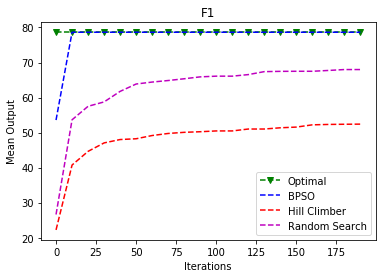

In [113]:
# parameters for experiment
problem = F1()
N = 30
W = 0.72984
C_1 = 2.05
C_2 = 2.05
VMAX = 6.0
generations = 200
step_size = 1.0

# get results for BPSO plot
results = np.zeros((3, generations))
res = run_BPSO_experiment(problem, N=N, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX)
step = math.ceil(len(res) / generations)
results[0] = res[::step]

# get results for Stochastic Hill Climber plot
res = run_hill_climber_experiment(problem, N=N, step_size=step_size)
step = math.ceil(len(res) / generations)
results[1] = res[::step]

# get results for random search plot
res = run_random_search_experiment(problem, N=N)
step = math.ceil(len(res) / generations)
results[2] = res[::step]

# produce results
plot_comparisons(results, problem.maximum, problem.name)
bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal = produce_results(problem, N=N, generations=generations, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX, step_size=step_size)
print_results(N, bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal)

Run Experiment on F2 benchmark function.

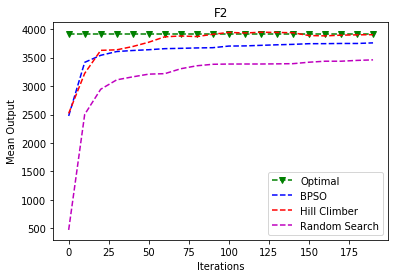

In [25]:
# parameters for experiment
problem = F2()
N = 30
W = 0.72984
C_1 = 2.05
C_2 = 2.05
VMAX = 6.0
generations = 200
step_size = 1.0

# get results for BPSO plot
results = np.zeros((3, generations))
res = run_BPSO_experiment(problem, N=N, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX)
step = math.ceil(len(res) / generations)
results[0] = res[::step]

# get results for Stochastic Hill Climber plot
res = run_hill_climber_experiment(problem, N=N, step_size=step_size)
step = math.ceil(len(res) / generations)
results[1] = res[::step]

# get results for random search plot
res = run_random_search_experiment(problem, N=N)
step = math.ceil(len(res) / generations)
results[2] = res[::step]

# produce results
plot_comparisons(results, problem.maximum, problem.name)
bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal = produce_results(problem, N=N, generations=generations, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX, step_size=step_size)
print_results(N, bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal)

Run Experiment on F3 benchmark function.

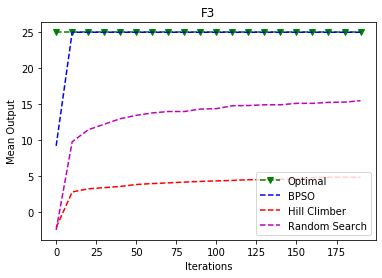

In [65]:
# parameters for experiment
problem = F3()
N = 30
W = 0.72984
C_1 = 2.05
C_2 = 2.05
VMAX = 6.0
generations = 200
step_size = 0.9

# get results for BPSO plot
results = np.zeros((3, generations))
res = run_BPSO_experiment(problem, N=N, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX)
step = math.ceil(len(res) / generations)
results[0] = res[::step]

# get results for Stochastic Hill Climber plot
res = run_hill_climber_experiment(problem, N=N, step_size=step_size)
step = math.ceil(len(res) / generations)
results[1] = res[::step]

# get results for random search plot
res = run_random_search_experiment(problem, N=N)
step = math.ceil(len(res) / generations)
results[2] = res[::step]

# produce results
plot_comparisons(results, problem.maximum, problem.name)
bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal = produce_results(problem, N=N, generations=generations, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX, step_size=step_size)
print_results(N, bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal)

Run Experiment on F4 benchmark function.

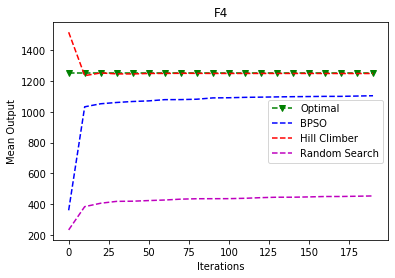

In [66]:
# parameters for experiment
problem = F4()
N = 30
W = 0.72984
C_1 = 2.05
C_2 = 2.05
VMAX = 6.0
generations = 200
step_size = 0.7

# get results for BPSO plot
results = np.zeros((3, generations))
res = run_BPSO_experiment(problem, N=N, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX)
step = math.ceil(len(res) / generations)
results[0] = res[::step]

# get results for Stochastic Hill Climber plot
res = run_hill_climber_experiment(problem, N=N, step_size=step_size)
step = math.ceil(len(res) / generations)
results[1] = res[::step]

# get results for random search plot
res = run_random_search_experiment(problem, N=N)
step = math.ceil(len(res) / generations)
results[2] = res[::step]

# produce results
plot_comparisons(results, problem.maximum, problem.name)
bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal = produce_results(problem, N=N, generations=generations, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX, step_size=step_size)
print_results(N, bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal)

Run Experiment on F5 benchmark function.

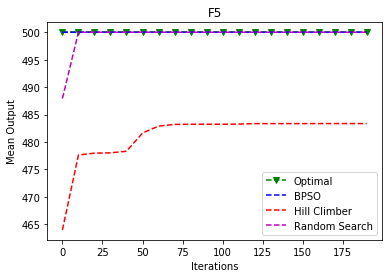

In [88]:
# parameters for experiment
problem = F5()
N = 30
W = 0.72984
C_1 = 2.05
C_2 = 2.05
VMAX = 6.0
generations = 200
step_size = 0.8

# get results for BPSO plot
results = np.zeros((3, generations))
res = run_BPSO_experiment(problem, N=N, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX)
step = math.ceil(len(res) / generations)
results[0] = res[::step]

# get results for Stochastic Hill Climber plot
res = run_hill_climber_experiment(problem, N=N, step_size=step_size)
step = math.ceil(len(res) / generations)
results[1] = res[::step]

# get results for random search plot
res = run_random_search_experiment(problem, N=N)
step = math.ceil(len(res) / generations)
results[2] = res[::step]

# produce results
plot_comparisons(results, problem.maximum, problem.name)
bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal = produce_results(problem, N=N, generations=generations, W=W, C_1=C_1, C_2=C_2, VMAX=VMAX, step_size=step_size)
print_results(N, bpso_ham, hamming_optimal, bpso_mean_error, bpso_std_error, bpso_optimal, hill_mean_error, hill_std_error, hill_optimal, rand_mean_error, rand_std_error, rand_optimal)